# Bayesian exercise with m&m's 
Before we get started, let's review some of the notation:

$\theta \rightarrow$ percentage of blue m&m's. This is the parameter we are trying to infer.

$n \rightarrow$ total number of m&m's in the bag

$y \rightarrow$ number of blue m&m's in the bag

## 1. Defining the prior distribution
As discussed, you are going to use the conjugate prior to the binomial distribution --- the beta distribution --- to quantify your prior information on the percentage $\theta$ of blue m&m's. Recall that the beta distribution has two parameters that define its shape, $\alpha$ and $\beta$, and that it has the form:
\begin{equation}
    p(\theta) \propto \theta^{\alpha-1}(1-\theta)^{\beta-1}
\end{equation}

To get a feel for how the values of the parameters $\alpha$ and $\beta$ "shape" the distribution, look at the example below.

In [1]:
# we need the stats package in R for the dbeta function
library(stats)

Create a few sets of values for ($\alpha$, $\beta$):

In [2]:
# alpha and beta both equal to one
a1 = 1
b1 = 1

# alpha and beta are equal to each other but not equal to one
a2 = 5
b2 = 5

# alpha < beta 
a3 = 1
b3 = 5

# alpha > beta
a4 = 5
b4 = 1

Now plot the four different beta distributions that these parameter values create:

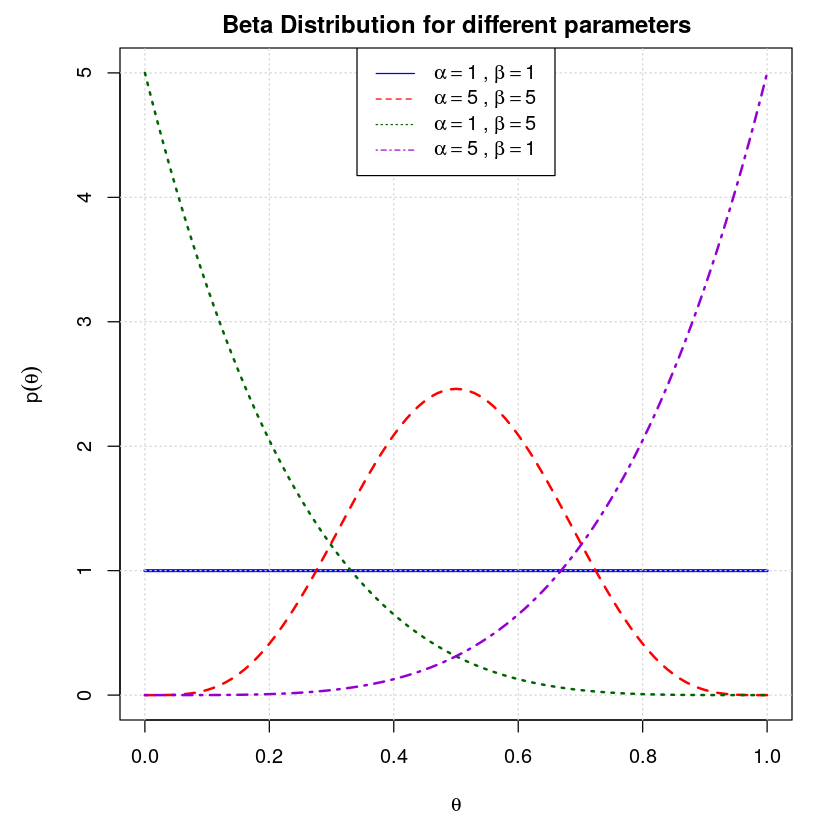

In [3]:
# set the margins
par(mar=c(5,5,2,2))
# plot the prior distribution from students
curve(dbeta(x, shape1 = a1, shape2 = b1), col = "blue",
      xlab = expression(theta), ylab = expression(p(theta)), lwd = 2.5, main="Beta Distribution for different parameters", ylim=c(0,5))
# add a grid to the plot if you like
grid()

# add more curves of the beta distribution made using different alpha and beta values
curve(dbeta(x, shape1 = a2, shape2 = b2), add=TRUE, lty=2, lwd=2, col="red")
curve(dbeta(x, shape1 = a3, shape2 = b3), add=TRUE, lty=3, lwd=2, col = "darkgreen")
curve(dbeta(x, shape1 = a4, shape2 = b4), add=TRUE, lty=4, lwd=2, col="darkviolet")

# add a legend showing the alpha and beta values
legend("top", legend = c(
  as.expression( bquote(alpha == .(a1)~","~beta == .(b1)) ), 
  as.expression( bquote(alpha == .(a2)~","~beta == .(b2)) ),
  as.expression( bquote(alpha == .(a3)~","~beta == .(b3)) ),
  as.expression( bquote(alpha == .(a4)~","~beta == .(b4)) )
  ), lty=c(1,2,3,4), col=c("blue", "red", "darkgreen", "darkviolet"))

For reference, the mean and variance of the beta distribution are given by
\begin{equation}
E\left[\theta \right] = \frac{\alpha}{\alpha+\beta}
\end{equation}

\begin{equation}
Var\left[ \theta \right] = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1}
\end{equation}

Let's create functions to calculate these quantities, which will be used later:

In [4]:
# function to calculate the expected value (the mean) of the beta distribution
mean.beta = function( a, b ){ 
  a/(a+b)
}

# function to calculate the variance of the beta distribution
var.beta = function( a, b){
  a*b/( (a + b)^2 * (a + b + 1) )
}


### Now find $\alpha$ and $\beta$ values that make a beta distribution that looks like the one you sketched in class.
Change the values of "mya" and "myb" below to get the shape you want.

In [5]:
mya = 2
myb = 9

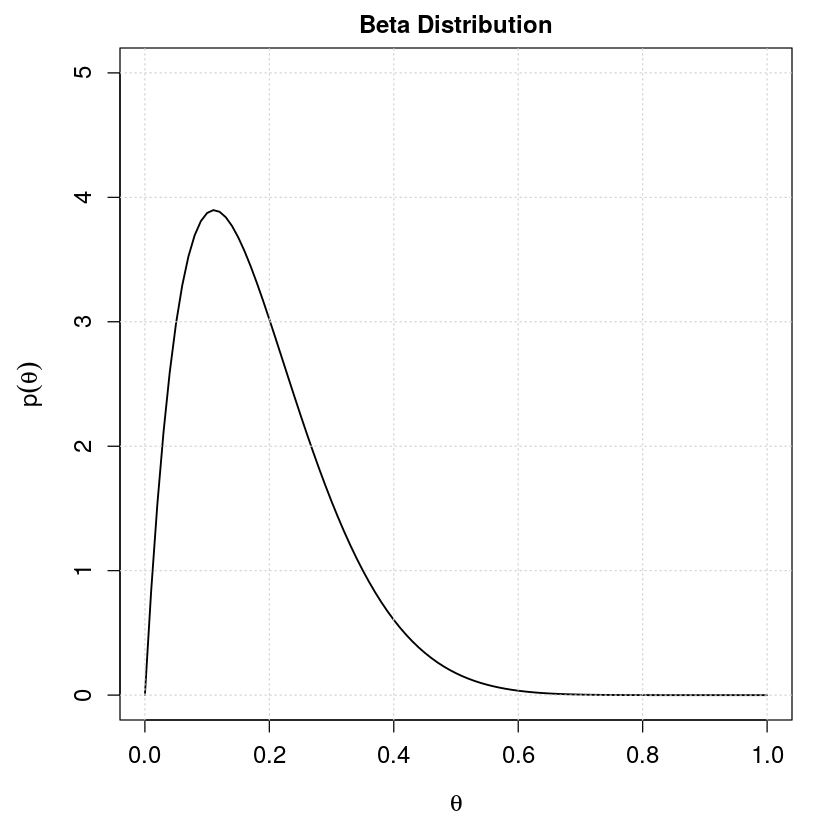

In [6]:
# set the margins
par(mar=c(5,5,2,2))

# plot your prior distribution for the percentage of blue m&m's
curve(dbeta(x, shape1 = mya, shape2 = myb),
      xlab = expression(theta), ylab = expression(p(theta)) , cex.lab=1.2, cex.axis=1.2, lwd = 1.5, main="Beta Distribution", ylim=c(0,5))
# add a grid to the plot if you like
grid()


#### Calculate the mean and variance of your prior distribution

In [7]:
priormean = mean.beta(a = mya, b = myb)
priorvar = var.beta(a = mya, b = myb)
print(c(priormean,priorvar))

[1] 0.18181818 0.01239669


## 2. Product of likelihood and prior
Simplify the product of the likelihood (binomial distribution) and the prior (beta distribution), and identify the kernel of the posterior distribution, 
\begin{equation}
p(\theta|y) \propto \theta^{y + \alpha -1} (1 - \theta)^{n-y + \beta -1}.
\end{equation}

The above equation still has the form of a beta distribution, except now the parameters defining the distribution are $(y + \alpha)$ and $(n-y -\beta)$. Recall that the values of $n$ and $y$ come from the data. 


## 3. Open the m&m's bag and record the data

In [9]:
# total number of m&m's
ntotal = 21
# number of each colour (in case you want to look at the other colours at some point)
nblue = 6
norange = 7
ngreen = 3
nyellow = 4
nred = 0
nbrown = 1

## 3. Plot the posterior distribution give $n$, $y$, $\alpha$, and $\beta$

Next, we will plot the posterior distribution given the data and the prior, and the mean of the posterior distribution. Recall that the posterior distribution has the kernel of the beta distribution, but is parameterized slightly differently. We already wrote functions to calculate the mean of the beta distribution given $\alpha$ and $\beta$ values:

In [13]:
print(mean.beta)

function( a, b ){ 
  a/(a+b)
}


In [14]:
print(var.beta)

function( a, b){
  a*b/( (a + b)^2 * (a + b + 1) )
}


But now "a" and "b" are given by $y + \alpha$, and $n - y + \beta$ (If this is confusing, then look at the equation of the posterior distribution again, and compare it to the equation for the beta distribution). 

So to calculate the mean and variance, we do the following:

In [17]:
mean.posterior = mean.beta(a = (nblue + mya), b = (ntotal - nblue + myb) )
var.posterior = var.beta(a = (nblue + mya), b = (ntotal - nblue + myb) )
print(c(mean.posterior, var.posterior))

[1] 0.250000000 0.005681818


We are ready to plot the posterior distribution, add a line showing the mean, and compare it to the prior distribution.

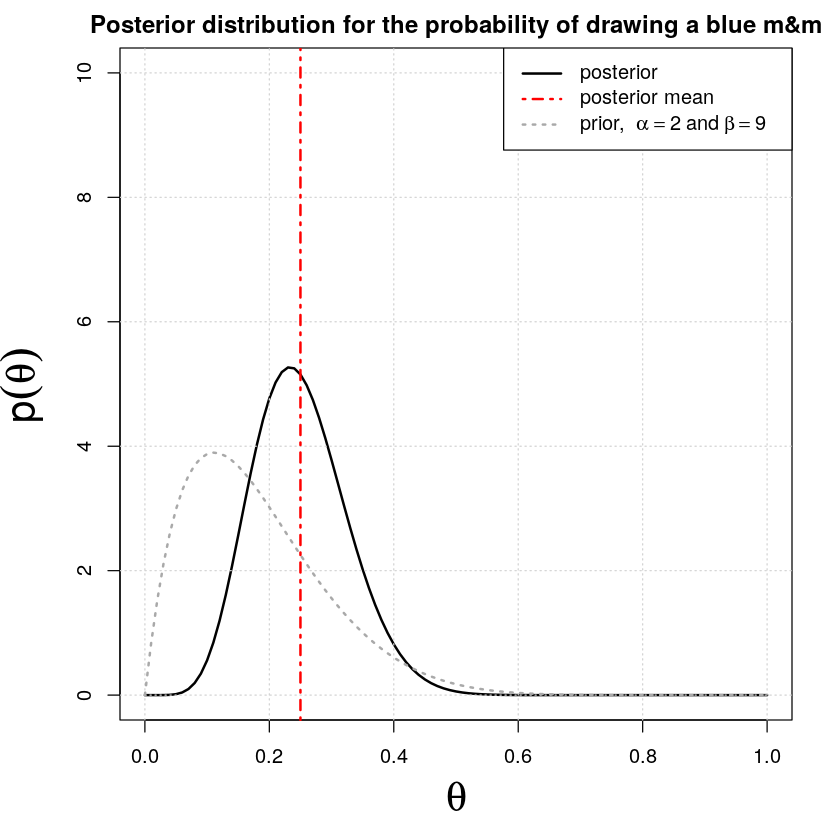

In [28]:
par( mar = c(5,5,2,2))

# plot the posterior distribution
curve( dbeta( x, shape1 = (nblue + mya), shape2 = (ntotal - nblue + myb) ),
      xlab = expression(theta), ylab = expression(p(theta)) , 
      main = "Posterior distribution for the probability of drawing a blue m&m", 
      cex.lab=2, lwd=2, ylim=c(0,10))

grid()

# add a line to show the mean of the posterior
abline(v=mean.posterior, lty=4, lwd=2, col="red")

# add the prior distribution, to compare
curve(dbeta(x, shape1 = mya, shape2 = myb), lwd=2, lty=3, add=TRUE, col="darkgrey")

# add a legend
legend("topright",
       legend = c("posterior", 
                  as.expression(bquote("posterior mean"~== , 
                  as.expression(bquote("prior, "~alpha == .(mya)~"and"~beta == .(myb))) ),
       lty=c(1,4,3), lwd=2, col=c("black", "red", "darkgrey"))